In [71]:
%%bash
# 10 years
curl -L -o ../data/dax.csv "https://query1.finance.yahoo.com/v7/finance/download/%5EGDAXI?period1=1276905600&period2=1592524800&interval=1d&events=history"
# 1 year
#curl -L -o ../data/dax.csv "https://query1.finance.yahoo.com/v7/finance/download/%5EGDAXI?period1=1560902400&period2=1592524800&interval=1d&events=history"
# 6 months
#curl -L -o ../data/dax.csv "https://query1.finance.yahoo.com/v7/finance/download/%5EGDAXI?period1=1579392000&period2=1592524800&interval=1d&events=history"



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  204k    0  204k    0     0   645k      0 --:--:-- --:--:-- --:--:--  643k


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("../data/dax.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-21,6320.410156,6330.810059,6263.410156,6292.970215,6292.970215,92615800.0
1,2010-06-22,6254.859863,6295.580078,6216.390137,6269.040039,6269.040039,86801700.0
2,2010-06-23,6219.200195,6271.850098,6178.839844,6204.520020,6204.520020,96948000.0
3,2010-06-24,6232.379883,6235.479980,6097.009766,6115.479980,6115.479980,113903600.0
4,2010-06-25,6116.229980,6149.870117,6039.560059,6070.600098,6070.600098,101546500.0


In [73]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03
mean,9800.075823,9863.118263,9730.404295,9798.825596,9798.825596,1.060874e+08
std,2310.681380,2315.113509,2306.360078,2310.342684,2310.342684,4.986903e+07
min,5063.589844,5126.520020,4965.799805,5072.330078,5072.330078,0.000000e+00
25%,7493.289917,7537.005127,7443.942504,7500.905151,7500.905151,7.826220e+07
50%,9948.350098,10024.194825,9891.939942,9951.850098,9951.850098,9.685455e+07
75%,11923.347412,12002.507568,11849.352051,11940.427490,11940.427490,1.227763e+08
max,13774.440430,13795.240234,13754.040039,13789.000000,13789.000000,4.357879e+08


In [74]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2010-06-21,6292.970215
1,2010-06-22,6269.040039
2,2010-06-23,6204.520020
3,2010-06-24,6115.479980
4,2010-06-25,6070.600098


In [75]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

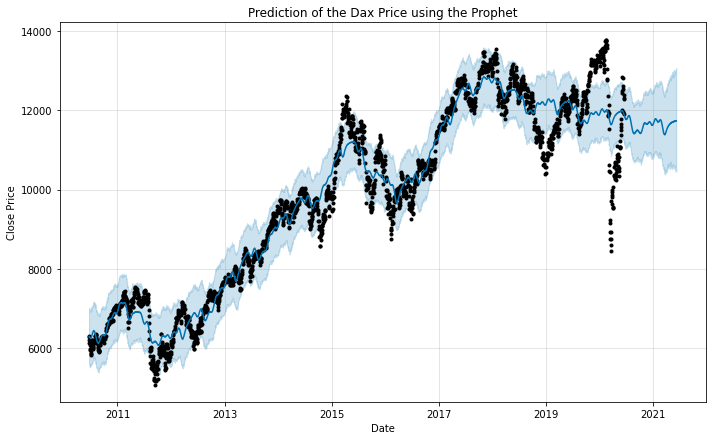

In [76]:
future = m.make_future_dataframe(periods=356) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Dax Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

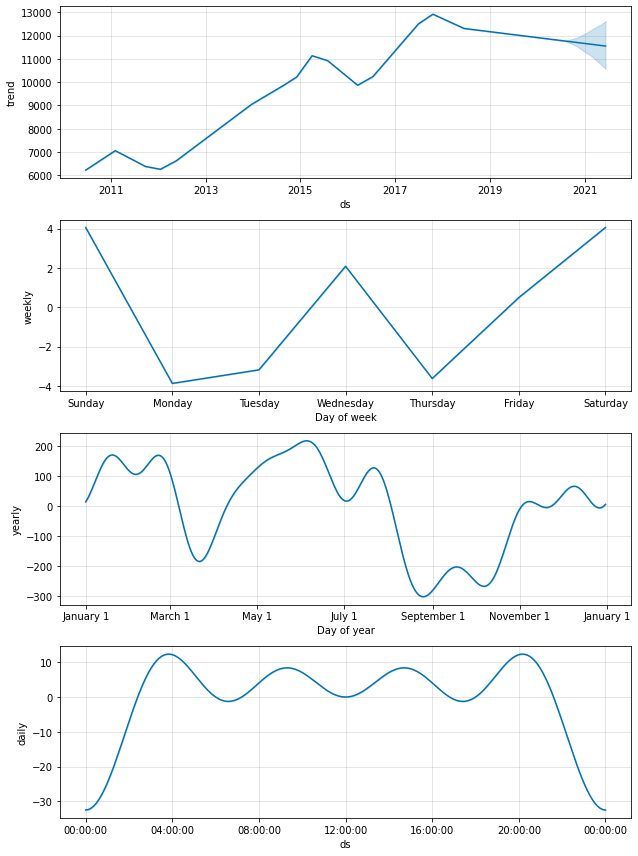

In [77]:
m.plot_components(prediction)
plt.show()